# Interpretable Machine Learning
## Exercise Sheet: 3
## This exercise sheet covers chapters 5.4 and 5.5 from the IML book by Christoph Molnar

Kristin Blesch (blesch@leibniz-bips.de)<br>
Niklas Koenen (koenen@leibniz-bips.de)
<hr style="border:1.5px solid gray"> </hr>

# 1) Decision Trees

## a) Data
For this exercise, we will use the famous `iris` data set that contains multivariate data on iris flowers. Load the data an get yourself familiar with the explanatory variables. 

Hint: have a look at `feature_names` and `target_names`.

**Solution:**

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## b) Decision Tree model

#### 1. We now want to build a decision tree model that predicts whether the iris flower is of kind `'setosa', 'versicolor'` or `'virginica'`. For this purpose, do we have to fit a regression or classification decision tree? 

**Solution:**


This is a classification problem as the iris flower belongs to one out of three possible categories. 

#### 2. Fit a decision tree model using the iris data set.
**Solution:**

In [9]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(iris.data, iris.target)

#### 3. Display the fitted tree in text format. Explain how to read the output and interpret the results! 
**Solution:**

In [10]:
from sklearn.tree import export_text
tree_text_plot = export_text(model, feature_names=iris['feature_names'])
print(tree_text_plot)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



Reading the output from left to right and top to bottom gives information on splitting nodes, i.e. which variable was used for splitting and at which level; Example: Petal length is chosen as root node to classify `class 0` if `petal length <= 2.45`. If `petal length > 2.45`, the decision tree continues with subsequent nodes to split, in this case `petal width <= 1.75`.

#### 4. Display the fitted tree graphically using the `plot_tree()` method. Explain how to read the output and interpret the results! 
**Solution:**

[Text(390.6, 697.62, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(330.50769230769237, 570.78, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(450.69230769230774, 570.78, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(240.3692307692308, 443.94, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(120.1846153846154, 317.1, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(60.0923076923077, 190.26, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(180.27692307692308, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(360.55384615384617, 317.1, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(300.4615384615385, 190.26, 'gini = 0.0\nsamples = 3\nvalue =

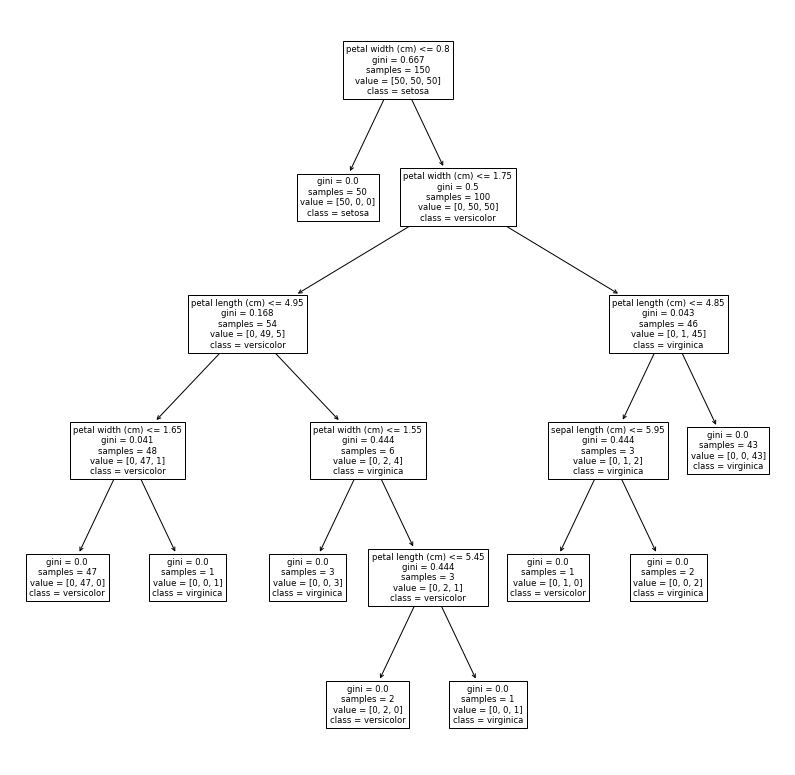

In [11]:
# adjusting the size of the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14)) 

tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names)

Reading the output from top to bottom gives information on splitting nodes, i.e. which variable was used for splitting and at which level; Example: Petal length is chosen as root node to classify `setosa` if `petal length <= 2.45`. If `petal length > 2.45`, the decision tree continues with subsequent nodes to split, in this case `petal width <= 1.75`.

#### 5. In the graph there are values of the so-called 'Gini impurity' displayed, what do these values tell us?
**Solution:**

"The Gini index tells us how “impure” a node is, e.g. if all classes have the same frequency, the node is impure, if only one class is present, it is maximally pure." (IML book by Christoph Molnar, Chapter 4.4)

# 2) Decision Rules 

#### a) Explain what decision rules are and give an example.



**Solution:**
- "A decision rule is a simple IF-THEN statement consisting of a condition (also called antecedent) and a prediction" from Chapter 5.4
- One possible example: IF you read the IML book AND follow exercise sessions on a regular basis THEN you will have an easy time preparing for the exam of this course.

#### b) In many cases, making accurate predictions does not only require a single decision rule, but many. However, this might lead to confusion, for example if multiple decision rules apply at the same time.  What strategies can we use to combine different decision rules?


**Solution:**
1. Using a decision list to order the decision rules: List all rules and use the prediction of the first rule in the list that applies.
2. Using a decision set: "In a set, the rules are either mutually exclusive, or there is a strategy for resolving conflicts, such as majority voting, which may be weighted by the individual rule accuracies or other quality measures. Interpretability suffers potentially when several rules apply."

#### c) What is OneR? How does the algorithm work?

**Solution**
OneR is one way to learn rules from data. From all the features, OneR selects the one feature that carries the most information about the outcome of interest and creates decision rules from this feature.

"The algorithm is simple and fast:

1. Discretize the continuous features by choosing appropriate intervals.
For each feature:
2. Create a cross table between the feature values and the (categorical) outcome.
- For each value of the feature, create a rule which predicts the most frequent class of the instances that have this particular feature value (can be read from the cross table).
- Calculate the total error of the rules for the feature.
3. Select the feature with the smallest total error."

#### d) Apply the OneR classification algorithm to the same predictive problem as in task 1 (iris data set), show the rules applied for prediction and then generate predictions for the training data. 

**Hint**
Import the classifier, fit the model, predict the iris type using training data (i.e. we don't expect a train/test split for this exercise)

In [12]:
from mlxtend.classifier import OneRClassifier


**Solution**

In [14]:
from mlxtend.classifier import OneRClassifier
oner = OneRClassifier()

oner.fit(iris.data, iris.target)

OneRClassifier()

In [35]:
iris.feature_names[oner.feature_idx_]

'petal width (cm)'

Column 'petal width' has been selected for the decision rule.

In [22]:
oner.prediction_dict_

{'total error': 6,
 'rules (value: class)': {0.1: 0,
  0.2: 0,
  0.3: 0,
  0.4: 0,
  0.5: 0,
  0.6: 0,
  1.0: 1,
  1.1: 1,
  1.2: 1,
  1.3: 1,
  1.4: 1,
  1.5: 1,
  1.6: 1,
  1.7: 1,
  1.8: 2,
  1.9: 2,
  2.0: 2,
  2.1: 2,
  2.2: 2,
  2.3: 2,
  2.4: 2,
  2.5: 2}}

In [15]:
oner.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Having a look at how often the prediction was right:

In [38]:
iris.target == oner.predict(iris.data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])